In [5]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 28.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
print(os.listdir()) 

['.git', 'references.bib', 'main.tex', 'ucetd.cls', 'Moral_Alignment.ipynb', '18_QSurvey .csv']


In [16]:
list(df.columns)


['Q1 How do you describe yourself',
 'Q2 Choose one or more races that you consider yourself to be',
 'Q3 What is the highest level of education you have completed?',
 'Q4 My political preferences lean...',
 'Q5 I take pride in the U.S. Constitution and feel that its core values align with my personal beliefs.',
 'Q6 I would rather be a citizen of America than any other country.',
 'Q7 It would be disrespectful for myself or another American to criticize U.S. policies.',
 'Q8 At this moment, which government do you feel most morally aligned with?',
 "Q9 Indicate your level of agreement: I felt the need to defend and support the U.S. after reading the Prime Minister's remarks.",
 "Q10 The Prime Minister's remarks reflect my own concerns and I felt understood, even if I felt the need to defend the U.S.",
 'Q11 I believe the Prime Minister\x92s message was sincere.',
 "Q12 I support the Prime Minister's right to comment on this issue.",
 'Q13 After reading this article, my view on the Can

In [17]:
df.rename(columns={'Q8 At this moment, which government do you feel most morally aligned with?': 'Q8'}, inplace=True)
df.rename(columns={"Q9 Indicate your level of agreement: I felt the need to defend and support the U.S. after reading the Prime Minister's remarks.": 'Q9'}, inplace=True)

list(df.columns)


['Q1 How do you describe yourself',
 'Q2 Choose one or more races that you consider yourself to be',
 'Q3 What is the highest level of education you have completed?',
 'Q4 My political preferences lean...',
 'Q5 I take pride in the U.S. Constitution and feel that its core values align with my personal beliefs.',
 'Q6 I would rather be a citizen of America than any other country.',
 'Q7 It would be disrespectful for myself or another American to criticize U.S. policies.',
 'Q8',
 'Q9',
 "Q10 The Prime Minister's remarks reflect my own concerns and I felt understood, even if I felt the need to defend the U.S.",
 'Q11 I believe the Prime Minister\x92s message was sincere.',
 "Q12 I support the Prime Minister's right to comment on this issue.",
 'Q13 After reading this article, my view on the Canadian Prime Minister is...',
 'Q14 After reading this article, my view of the U.S. government is...',
 "Q15 Based on the article you read, how much do you support the U.S. government's data policy?

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("18_QSurvey .csv", encoding='ISO-8859-1')


#Rename columns for easier access
df = df.rename(columns={
    'Q8 At this moment, which government do you feel most morally aligned with?': 'Q8'
})

df = df.rename(columns={
    "Q9 Indicate your level of agreement: I felt the need to defend and support the U.S. after reading the Prime Minister's remarks.": 'Q9'
})

#Standardize Treatment column
df['Treatment'] = df['Treatment'].astype(str).str.strip().str.lower()

#Map responses to numerical scores
q8_map = {
    'Canada': -1,
    'Neither': 0,
    'The United States': 1
}
q9_map = {
    'Strongly disagree': -1,
    'Somewhat disagree': -1,
    'Neither agree nor disagree': 0,
    'Somewhat agree': 1,
    'Strongly agree': 1
}

#Apply the mapping to create new score columns
df['Q8_score'] = df['Q8'].map(q8_map)
df['Q9_score'] = df['Q9'].map(q9_map)

#Calculate Moral Alignment as the average of Q8 and Q9 scores
df['Moral_Alignment'] = df[['Q8_score', 'Q9_score']].mean(axis=1)


                            OLS Regression Results                            
Dep. Variable:        Moral_Alignment   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.276
Date:                Thu, 24 Jul 2025   Prob (F-statistic):              0.259
Time:                        09:58:17   Log-Likelihood:                -509.31
No. Observations:                 402   AIC:                             1023.
Df Residuals:                     400   BIC:                             1031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/tmp/ipykernel_14423/1441833544.py:21: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=coef_df, x='coef', y='term', join=False, color='black')


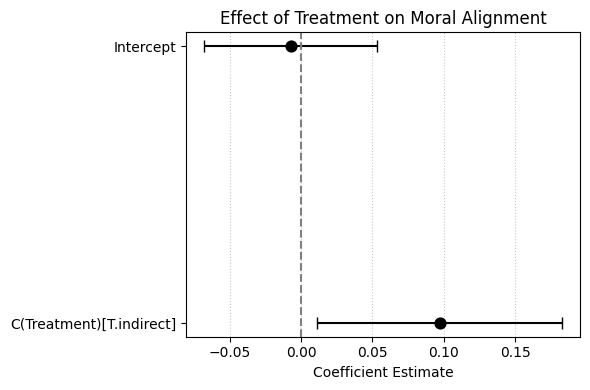

                            OLS Regression Results                            
Dep. Variable:        Moral_Alignment   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.276
Date:                Thu, 24 Jul 2025   Prob (F-statistic):              0.259
Time:                        09:58:17   Log-Likelihood:                -509.31
No. Observations:                 402   AIC:                             1023.
Df Residuals:                     400   BIC:                             1031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [30]:
#Regression analysis and plotting for Moral Alignment.

# Run regression: does treatment (direct vs indirect) affect Moral_Alignment?
##df_trimmed = df.iloc[2:]
##model = smf.ols('Moral_Alignment ~ C(Treatment)', data=df_trimmed).fit()
model = smf.ols('Moral_Alignment ~ C(Treatment)', data=df).fit()
print(model.summary())

# Coefficients for plotting
coefs = model.params
errors = model.bse

#Plotting
coef_df = pd.DataFrame({
    'coef': coefs,
    'err': errors
}).reset_index().rename(columns={'index': 'term'})

# Plotting
plt.figure(figsize=(6, 4))
sns.pointplot(data=coef_df, x='coef', y='term', join=False, color='black')
plt.errorbar(coef_df['coef'], coef_df['term'], xerr=coef_df['err'], fmt='o', color='black', capsize=4)
plt.axvline(0, linestyle='--', color='gray')
plt.title("Effect of Treatment on Moral Alignment")
plt.xlabel("Coefficient Estimate")
plt.ylabel("")
plt.tight_layout()
plt.grid(True, axis='x', linestyle=':', alpha=0.7)
plt.show()

model = smf.ols('Moral_Alignment ~ C(Treatment)', data=df).fit()
print(model.summary())

In [ ]:
import

- The file `"18_QSurvey.csv"` does not exist in your current working directory.
- There is a typo in the filename or path.
- The pandas library (`pd`) is not imported (but in your code, it is).
- There is a problem with the file encoding or file format.

Check that the file is present in the same directory as your notebook, and that the filename and path are correct. If the file is missing, upload it or provide the correct path.